# Kelompok 1 Data Mining SD-A2
#### **Anggota**:
#### - Najma Attaqiya Alya (162012133015)
#### - Muhammad Hanif Sudibyo (162012133040)
#### - Razin Isyraq Thirafi (162012133056)
#### - Ergidya Liviani (162012133065)

## Dataset yang digunakan:
https://unairacid-my.sharepoint.com/:f:/g/personal/muhammad_hanif_sudibyo-2020_ftmm_drive_unair_ac_id/EhQur1UzripBgWcTK-j69A8BwQakXwH_x4bZuhBStA2qvQ?e=P4QZqn

Dataset merupakan data yang memuat gambar display dari website toko fashion terkenal seperti Louis Vuitton, Dior, Gucci, Uniqlo, dan Prada.

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Packages
<a class="anchor" id="1"></a> 

In [19]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import cv2
import os

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.utils import load_img, img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import confusion_matrix, classification_report

# Import Dataset

In [3]:
labels = ['Bags','Belts','Boots','Dresses','Hats','Jackets & Coats','Jewelry','Knitwear','Loafers',
 'Pants','Sandals','Scarves','Skirt','Sneakers','Sunglasses','T-Shirts']

X = []
y_train = []

image_size = 400 

# All Data
for i in labels:
    folderPath = os.path.join(r"C:\Users\Zagreus\Documents\DUMMY\Dokumen Pribadi\College\Data Mining II\12.1. Scrap Fashion\Dataset",i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        try:
            img = cv2.resize(img,(image_size,image_size))
        except:
            print(i, j)
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        X.append(img)
        y_train.append(i)
print('Data train DONE!')

X = np.array(X)
y_train = np.array(y_train)

100%|██████████| 677/677 [00:20<00:00, 33.06it/s] 


Data train DONE!


In [4]:
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(X, y_train, train_size=0.8, random_state=42)

In [5]:
X_train = x_train.astype('float32') #set x_train data type as float32
X_test = x_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new.copy()
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new.copy()
y_test = tf.keras.utils.to_categorical(y_test)

# Model Predict

In [2]:
model = keras.models.load_model('./WebAppDM/model_inception.h5')

In [7]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

print(classification_report(y_test_new,pred,target_names=labels, digits=6))

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [10]:
y_hat = model.predict(X_test)
# Plot a random sample of 54 test images, their predicted labels and ground truth
figure = plt.figure(figsize= (25, 40))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=70, replace=False)): # size (jumlah total data uji)
    ax = figure.add_subplot(20, 4, i + 1, xticks=[], yticks=[]) #ukuran 10 X 7 untuk visualisasi gambar pada heatmap confusion matrix
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

1/1 [==============================] - 0s 40ms/step


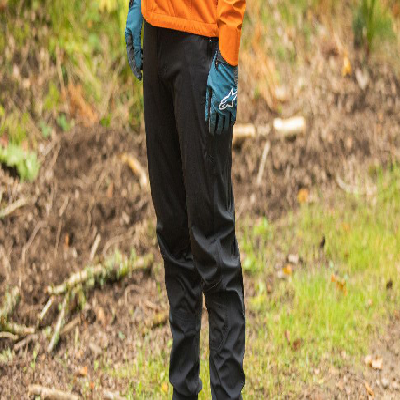

Label : Boots


In [15]:
# load an image from file
image = load_img('./example_images/Trouser Crop.jpg', target_size=(400, 400))
# convert the image pixels to a numpy array
image_pixels = img_to_array(image)
# reshape data for the model
image_reshape = image_pixels.reshape((1, image_pixels.shape[0], image_pixels.shape[1], image_pixels.shape[2]))
# prepare the image for the VGG model
image_preprocess = preprocess_input(image_reshape)
# predict the probability across all output classes
yhat = model.predict(image_preprocess)
index = np.argmax(yhat)
result = labels[index]
display(image)
print('Label :', result)

# Visualisasi Layer

In [25]:
model_viz = Sequential()
model_viz.add(Conv2D(64,(4,4),input_shape=(400,400,3),activation='relu',padding='same'))
model_viz.add(BatchNormalization())
model_viz.add(MaxPooling2D(pool_size=(2,2)))
model_viz.add(Flatten())
model_viz.add(Dense(16, activation='softmax'))
model_viz.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

(1, 400, 400, 3)


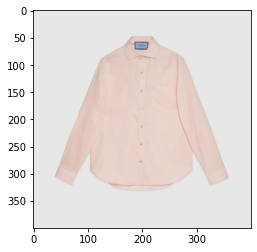

In [59]:
img_tensor = np.expand_dims(x_train[39], axis = 0)
print(img_tensor.shape)
plt.imshow(img_tensor[0])

In [82]:
print('Total banyak layers:')
len(model.layers[0].layers) + len(model.layers[1:])

Total banyak layers:


316

In [26]:
model_viz.layers

In [60]:
# Outputs of the 8 layers, which include conv2D and max pooling layers
layer_outputs = [layer.output for layer in model_viz.layers]
activation_model = models.Model(inputs = model_viz.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 236ms/step


In [61]:
layer_names = []
  
for layer in model_viz.layers:
  layer_names.append(layer.name)
print(layer_names)

['conv2d_1', 'batch_normalization_1', 'max_pooling2d_1', 'flatten_1', 'dense_1']


### Convolution

In [62]:
# Getting Activations of first layer
first_layer_activation = activations[0]
  
# shape of first layer activation
print(first_layer_activation.shape)

(1, 400, 400, 64)


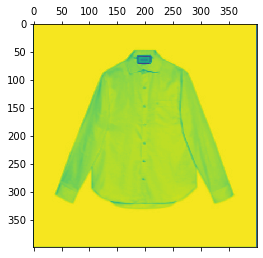

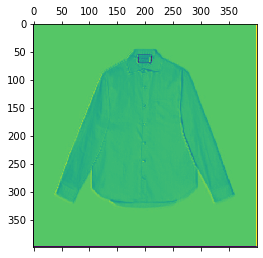

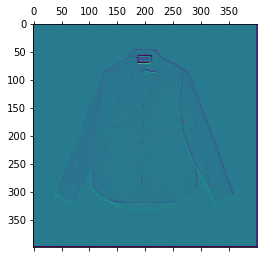

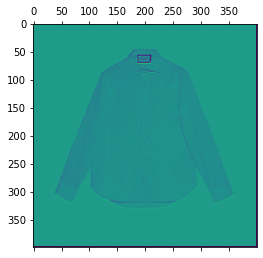

In [72]:
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')
plt.matshow(first_layer_activation[0, :, :, 3], cmap ='viridis')
plt.matshow(first_layer_activation[0, :, :, 35], cmap ='viridis')
plt.matshow(first_layer_activation[0, :, :, 13], cmap ='viridis')

plt.show()

### Batch Normalization

In [74]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 400, 400, 64)


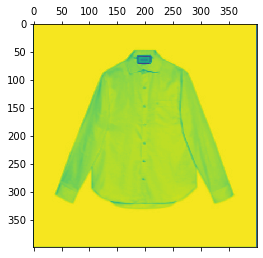

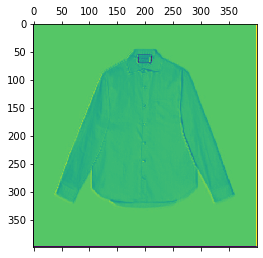

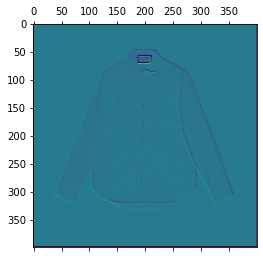

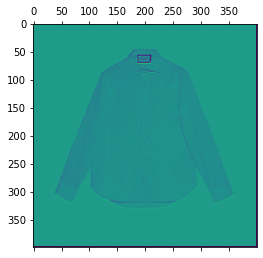

In [75]:
plt.matshow(second_layer_activation[0, :, :, 1], cmap ='viridis')
plt.matshow(second_layer_activation[0, :, :, 3], cmap ='viridis')
plt.matshow(second_layer_activation[0, :, :, 35], cmap ='viridis')
plt.matshow(second_layer_activation[0, :, :, 13], cmap ='viridis')
plt.show()

### Max Pooling

In [76]:
third_layer_activation = activations[2]
print(third_layer_activation.shape)

(1, 200, 200, 64)


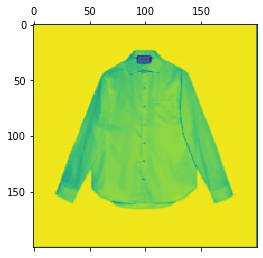

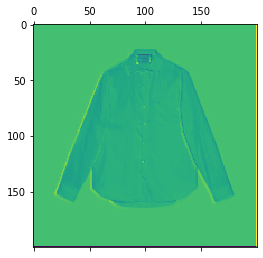

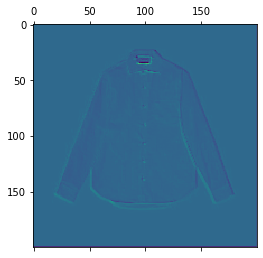

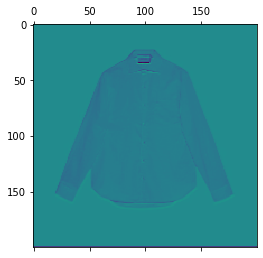

In [77]:
plt.matshow(third_layer_activation[0, :, :, 1], cmap ='viridis')
plt.matshow(third_layer_activation[0, :, :, 3], cmap ='viridis')
plt.matshow(third_layer_activation[0, :, :, 35], cmap ='viridis')
plt.matshow(third_layer_activation[0, :, :, 13], cmap ='viridis')
plt.show()